# Laboratorio 1

Rafael Ortega  123972 \
Eduardo Moreno  151280 \
Yedam Fortiz 119523

## Data profiling - EDA

In [1]:
import re
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import csv
import requests

In [2]:
import sys
sys.path.append('./../')

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

#Own Library modules
import src
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.algorithms import eda as eda_eq

In [3]:
# para leer el archivo como local
# agua = pd.read_csv('../data/consumo-agua.csv')

# Para leer el archivo directo desde la url:
CSV_URL = 'https://datos.cdmx.gob.mx/explore/dataset/consumo-agua/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
agua_liga = pd.read_csv(CSV_URL)
agua = agua_liga

# Otra forma de extraerlo desde la liga, pero menos eficiente
# CSV_URL = 'https://datos.cdmx.gob.mx/explore/dataset/consumo-agua/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
# r = requests.get(CSV_URL)
# with requests.Session() as s:
#     download = s.get(CSV_URL)

#     decoded_content = download.content.decode('utf-8')

#     cr = csv.reader(decoded_content.splitlines(), delimiter=',')
#     my_list = list(cr)

# agua = pd.DataFrame(my_list[1:len(my_list)], columns = my_list[0])

In [4]:
agua.head()

,Geo Point,Geo Shape,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des
0,"19.4552601937,-99.1126617526","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",159.72,2019,Gustavo A. Madero,42.566364,468.23,GUSTAVO A. MADERO,7 DE NOVIEMBRE,53.24,631.00,42.066667,3.05,3,3.05,57250,ALTO
1,"19.4552601937,-99.1126617526","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,35.936667,107.81,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,115.13,28.782500,7.32,3,7.32,57253,MEDIO
2,"19.4557195871,-99.1135822797","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,24.586000,122.93,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,197.96,32.993333,75.03,3,75.03,57255,POPULAR
3,"19.4596467168,-99.1044693641","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,0.000000,0.00,GUSTAVO A. MADERO,NUEVA TENOCHTITLAN,0.00,253.53,84.510000,84.51,3,253.53,57267,BAJO
4,"19.4741606185,-99.1467497317","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",56.72,2019,Azcapotzalco,67.436250,539.49,AZCAPOTZALCO,PROHOGAR,56.72,839.35,76.304545,121.57,3,243.14,57330,BAJO


### ¿Cuántas variables tenemos?

In [5]:
len(agua.columns)

17

### ¿Cuántas observaciones tenemos?

In [6]:
len(agua)

71102

### ¿Cuántas observaciones únicas tenemos por variable?

In [7]:
agua.nunique()

Geo Point               22930
Geo Shape               22922
consumo_total_mixto     24339
anio                        1
nomgeo                     17
consumo_prom_dom        52060
consumo_total_dom       47051
alcaldia                   16
colonia                  1340
consumo_prom_mixto      31911
consumo_total           56015
consumo_prom            62214
consumo_prom_no_dom     37440
bimestre                    3
consumo_total_no_dom    27336
gid                     71102
indice_des                  4
dtype: int64

#### Transformaciones que deberán realizarse más adelantte:
Geo Point                object --> split y dos float  
Geo Shape                object   
consumo_total_mixto     float64  
anio                      int64 --> Eliminar    
nomgeo                   object --> Categorica    
consumo_prom_dom        float64  
consumo_total_dom       float64  
alcaldia                 object --> Categorica   
colonia                  object --> Categorica  
consumo_prom_mixto      float64  
consumo_total           float64  
consumo_prom            float64  
consumo_prom_no_dom     float64  
bimestre                  int64 --> Categorica  
consumo_total_no_dom    float64  
gid                       int64 --> Categorica    
indice_des               object --> Categorica   

### ¿Cuántas variables numéricas tenemos?

In [8]:
eda_eq.cuenta_tipo_de_dato(agua,'numerico')

11

### ¿Cuántas variables de fecha tenemos?

In [9]:
eda_eq.cuenta_tipo_de_dato(agua,'Date')

0

### ¿Cuántas variables categóricas tenemos?

In [10]:
eda_eq.cuenta_tipo_de_dato(agua,'category')

0

### ¿Cuántas variables de texto tenemos?

In [11]:
eda_eq.cuenta_tipo_de_dato(agua,'object')

6

### Genera el profiling de cada variable (propio)

#### Perfilamiento general

In [12]:
eda_eq.genera_profiling_general(agua)

El dataframe tiene 17 columnas.
Hay 5 columnas que tienen NA's.


,Estadisticas,Resultado
0,Total de variables,17
1,Conteo de observaciones,71102
2,Total de celdas,1208734
3,Cantidad de variables numericas,11
4,Cantidad de variables de fecha,0
5,Cantidad de variables categóricas,0
6,Cantidad de variables de texto,6
7,Valores faltantes,26318
8,Porcentaje de valores faltantes,2.2%
9,Renglones duplicados,0


In [13]:
eda_eq.cuenta_nulos_por_columnas(agua)

El dataframe tiene 17 columnas.
Hay 5 columnas que tienen NA's.


,Missing Values,% del Total
consumo_total_mixto,8327,11.7
consumo_prom_mixto,8327,11.7
consumo_prom_dom,4820,6.8
consumo_total_dom,4820,6.8
Geo Shape,24,0.0


In [14]:
eda_eq.cuenta_nulos_por_renglones(agua)

Existen un total de:  8908 renglones con al menos un valor nulo

Representan el 12.53% del total de renglones.


8908

In [15]:
eda_eq.cuenta_nulos_por_renglones_tabla(agua)

,renglon,valores_nulos
58190,Nan in row 58190,5
25231,Nan in row 25231,4
56837,Nan in row 56837,4
26414,Nan in row 26414,4
26413,Nan in row 26413,4
56834,Nan in row 56834,4
26395,Nan in row 26395,4
56835,Nan in row 56835,4
56836,Nan in row 56836,4
26388,Nan in row 26388,4


## Perfilamiento por variable

In [16]:
profiling_numerico,profiling_categoricas,profiling_texto = eda_eq.genera_profiling_por_variable(agua)

In [17]:
#pd.set_option('display.max_colwidth', -1)
profiling_numerico

,metrica,anio,bimestre,gid,consumo_total_mixto,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom
0,tipo,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64
1,numero de observaciones,71102,71102,71102,62775,66282,66282,62775,71102,71102,71102,71102
2,media,2019,2.01,35551.5,174.36,29.13,1186.26,50.64,1695.85,111.22,126.76,436.06
3,desviacion estándar,0,0.81,20525.5,312.66,64.57,2771.04,130.41,3555.7,1069.95,1095.82,2126.15
4,cuartil 25%,2019,1,17776.2,0,18.69,161.64,0,340.95,23.01,6.28,10.98
5,cuartil 50%,2019,2,35551.5,79.94,26.41,604.18,33.45,896.18,31.69,19.28,54.06
6,cuartil 75%,2019,3,53326.8,233.32,36.25,1261.45,61.22,1808.9,45.48,54.19,230.43
7,minimo,2019,1,1,0,0,0,0,0,0,0,0
8,maximo,2019,3,71102,23404.4,7796.41,95060.7,11702.2,119727,89691.8,89691.8,119727
9,numero de observaciones unicas,1,3,71102,24339,52060,47051,31911,56015,62214,37440,27336


In [18]:
profiling_categoricas

'No hay variables categóricas'

In [19]:
profiling_texto

,metrica,Geo Point,Geo Shape,nomgeo,alcaldia,colonia,indice_des
0,tipo,object,object,object,object,object,object
1,numero de observaciones,71102,71102,71102,71102,71102,71102
2,observaciones unicas,22930,22922,17,16,1340,4
3,% observaciones unicas,0.322494,0.322382,0.000239093,0.000225029,0.0188462,5.62572e-05
4,tamano promedio,27.781,3295.96,12.4034,12.2552,16.8656,4.83564
5,tamano minmo,23,198,6,7,4,4
6,tamano maximo,28,61218,22,19,43,7


### Genera el profiling de cada variable (Pandas profiling)

In [20]:
#profile = ProfileReport(agua, title='Pandas Profiling Report')

In [21]:
#profile

In [22]:
#profile.to_file(output_file = '../results/pandas_profiling_inicial.html')

### ¿Cuántas alcadías tienes? ¿Cuántos nomgeo tienes? ¿Identificas algún error?

In [23]:
alcaldias = pd.unique(agua['alcaldia']) 
alcaldias_n = agua['alcaldia'].nunique()

In [24]:
print(alcaldias)
print(alcaldias_n)

['GUSTAVO A. MADERO' 'AZCAPOTZALCO' 'COYOACAN' 'TLALPAN' 'MILPA ALTA'
 'ALVARO OBREGON' 'CUAJIMALPA' 'TLAHUAC' 'MAGDALENA CONTRERAS'
 'XOCHIMILCO' 'IZTAPALAPA' 'IZTACALCO' 'BENITO JUAREZ' 'MIGUEL HIDALGO'
 'CUAUHTEMOC' 'VENUSTIANO CARRANZA']
16


In [25]:
nomgeos = pd.unique(agua['nomgeo']) 
nomgeos_n = agua['nomgeo'].nunique()

In [26]:
print(nomgeos)
print(nomgeos_n)

['Gustavo A. Madero' 'Azcapotzalco' 'Coyoacán' 'Talpan' 'Milpa Alta'
 'Álvaro Obregón' 'Cuajimalpa de Morelos' 'Tláhuac'
 'La Magdalena Contreras' 'Xochimilco' 'Iztapalapa' 'Iztacalco'
 'Benito Juárez' 'Miguel Hidalgo' 'Cuauhtémoc' 'Venustiano Carranza'
 'Tlalpan']
17


In [27]:
agua.loc[agua["nomgeo"].str.contains('Talpan', case = False, na = None), "nomgeo"] = 'Tlalpan'

In [28]:
nomgeos = pd.unique(agua['nomgeo']) 
nomgeos_n = agua['nomgeo'].nunique() 
print(nomgeos)
print(nomgeos_n)

['Gustavo A. Madero' 'Azcapotzalco' 'Coyoacán' 'Tlalpan' 'Milpa Alta'
 'Álvaro Obregón' 'Cuajimalpa de Morelos' 'Tláhuac'
 'La Magdalena Contreras' 'Xochimilco' 'Iztapalapa' 'Iztacalco'
 'Benito Juárez' 'Miguel Hidalgo' 'Cuauhtémoc' 'Venustiano Carranza']
16


### ¿Qué conocemos ahora de este set de datos por variable?

* El dataframe tiene 17 columnas.
* La variable `anio` tiene solamente un valor en toda la base de datos, por lo que no tendría sentido conservarla.
* La variable `nomgeo` contenía un error, poniendo como otra categoría la palabra `talpan`, dicho error fue corregido.
* `gid`indica el ID de cada observación.
* En realidad, deberían ser 8 variables numéricas
* Hay 26,318 valores faltantes en toda la base de datos, que corresponden al 2.2% de los datos.
* No hay valores duplicados
* Hay 5 columnas que tienen NA's --> `consumo_total_mixto, consumo_prom_mixto, consumo_prom_dom, consumo_total_dom y Geo Shape`
* En la variable consumo_total_no_dom y consumo_prom_no_dom los faltantes están expresados con ceros. --> **pregunta para cliente para ver si es correcto**
* La observación que tiene más valores faltantes es el 54,555, con 5 valores nulos.

-------------------------------------
##### Profiling numérico:
* La variable `consumo_total_mixto` tiene una desviación estándar muy alta (casi el doble de la media), hay una gran cantidad de ceros (incluso, llegan a ser por lo menos el 25% de los datos) --> son 17,715 ceros
* El cuartil 75% de la variable `consumo_total_mixto`está en un valor de 233, mientras que el máximo está en 23,404 --> podría indicar valores atípicos.
* La variable `consumo_prom_dom` tiene 9,861 ceros.
* El cuartil 75% de la variable `consumo_prom_dom`está en un valor de 36.25, mientras que el máximo está en 7,796 --> podría indicar valores atípicos.
* El cuartil 75% de la variable `consumo_total_dom`está en un valor de 1,261, mientras que el máximo está en 95,060 --> podría indicar valores atípicos.
* `consumo_total_mixto`y `consumo_prom_mixto` tienen la misma cantidad de ceros
* El cuartil 75% de la variable `consumo_prom_mixto`está en un valor de 61, mientras que el máximo está en 11,702 --> podría indicar valores atípicos.
* El cuartil 75% de la variable `consumo_total`está en un valor de 1,808, mientras que el máximo está en 119,727 --> podría indicar valores atípicos.
* La variable `consumo_prom`tiene una desviación estándar de 1,069 y una media de 111. Adicionalmente, el cuartil 75% está en un valor de 45, mientras el máximo está en 89,691.
* `consumo_prom_no_dom`y `consumo_total_no_dom`tienen ambas una media no tan alta, pero una desviación estándar muy grande y un máximo muy elevado.

-------------------------------------
##### Profiling categórico:
* `nomgeo`y `alcaldia`son variables redundantes, no es necesario mantener ambas.
* Iztapalapa, Gustavo A Madero y Cuauhtémoc son las alcaldías con más registros. --> verificar con cliente si es correcto.
* Hay muchísimas colonias
* Solo se tiene información de los primeros 3 bimestres del año
* `gid`indica el ID de cada observación.
* En cuanto al índice de desarrollo (`indice_des`), las tres clasificaciones con mayor cantidad de registros son:
 - bajo --> incluye el 41% de las observaciones
 - popular
 - alto
 
 Entre estas últimas tres, forman poco más del 80% de los registros, por lo que la categoría "medio" no está tan lejos de ellas.


-------------------------------------
##### Profiling fecha:

No hay variables de tipo fecha.


-------------------------------------
##### Profiling texto:

No hay variables que debieran estar como de tipo texto, sino más bien categóricas.

-------------------------------------

##### Comentarios para FE 
* Geo Point debe ser separada y dividida en `latitud` y `longitud`.
* Geo Shape indica información para gráficas geoespaciales.
* `nomgeo, alcaldía, colonia, bimestre, gid e indice_des`  deberían estar en formato categórico
* anio debería ser eliminada por tener un solo valor
* Solo se tiene información de los primeros 3 bimestres del año


### Transformar las variables a formato estándar: minúsculas, sin espacios en blanco, sin signos de puntuación.

In [29]:
agua = eda_eq.EstandarizaFormato(agua)
agua.head()

,geo_point,geo_shape,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des
0,"19.4552601937,-99.1126617526","{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",159.72,2019,gustavo a. madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto
1,"19.4552601937,-99.1126617526","{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio
2,"19.4557195871,-99.1135822797","{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular
3,"19.4596467168,-99.1044693641","{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo
4,"19.4741606185,-99.1467497317","{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",56.72,2019,azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo


In [30]:
agua = agua.astype({"bimestre":'category', "indice_des":'category', "nomgeo":'category', "alcaldia":'category',"colonia":'category', "gid":'category'}) 

In [31]:
agua.head()

,geo_point,geo_shape,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des
0,"19.4552601937,-99.1126617526","{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",159.72,2019,gustavo a. madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto
1,"19.4552601937,-99.1126617526","{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio
2,"19.4557195871,-99.1135822797","{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular
3,"19.4596467168,-99.1044693641","{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo
4,"19.4741606185,-99.1467497317","{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",56.72,2019,azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo


### Agregar la variable latitud y longitud.

In [32]:
new = agua['geo_point'].str.split(",", n = 1, expand = True) 
agua["latitud"]= new[0] 
agua["longitud"]= new[1] 

### Pasar la variable latitud y longitud a numérica -si no la tomó como numérica-.

In [33]:
# Revisamos si está como tipo numérico
agua.dtypes

geo_point                 object
geo_shape                 object
consumo_total_mixto      float64
anio                       int64
nomgeo                  category
consumo_prom_dom         float64
consumo_total_dom        float64
alcaldia                category
colonia                 category
consumo_prom_mixto       float64
consumo_total            float64
consumo_prom             float64
consumo_prom_no_dom      float64
bimestre                category
consumo_total_no_dom     float64
gid                     category
indice_des              category
latitud                   object
longitud                  object
dtype: object

In [34]:
agua = agua.astype({"latitud":'float64', "longitud":'float64'}) 
agua.dtypes

geo_point                 object
geo_shape                 object
consumo_total_mixto      float64
anio                       int64
nomgeo                  category
consumo_prom_dom         float64
consumo_total_dom        float64
alcaldia                category
colonia                 category
consumo_prom_mixto       float64
consumo_total            float64
consumo_prom             float64
consumo_prom_no_dom      float64
bimestre                category
consumo_total_no_dom     float64
gid                     category
indice_des              category
latitud                  float64
longitud                 float64
dtype: object

### Eliminar la columna geo_point -una vez que creaste la variable latitud y longitud.

In [35]:
agua.drop(columns =["geo_point"], inplace = True) 
agua.head()

,geo_shape,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",159.72,2019,gustavo a. madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",56.72,2019,azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


### Eliminar la columna geo_shape.

In [36]:
agua.drop(columns =["geo_shape"], inplace = True) 
agua.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,gustavo a. madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,gustavo a. madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,gustavo a. madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,gustavo a. madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


### Cambiar a minúsculas las columnas alcaldía, colonia e indice_des.

hecho con las funciones anteriores

### Volver a correr el proceso de identificación de variables numéricas, categóricas, texto y fechas.

#### Variables numéricas

In [37]:
eda_eq.cuenta_tipo_de_dato(agua,'numerico')

11

#### Variables categóricas

In [38]:
eda_eq.cuenta_tipo_de_dato(agua,'category')

6

#### Variables de texto

In [39]:
eda_eq.cuenta_tipo_de_dato(agua,'object')

0

#### Variables de tipo fecha

In [40]:
eda_eq.cuenta_tipo_de_dato(agua,'Date')

0

### Genera el data profiling por variable (puedes ocupar el paquete pandas-profiling de pandas)

#### Perfilamiento propio --> General

In [41]:
eda_eq.genera_profiling_general(agua)

El dataframe tiene 17 columnas.
Hay 4 columnas que tienen NA's.


,Estadisticas,Resultado
0,Total de variables,17
1,Conteo de observaciones,71102
2,Total de celdas,1208734
3,Cantidad de variables numericas,11
4,Cantidad de variables de fecha,0
5,Cantidad de variables categóricas,6
6,Cantidad de variables de texto,0
7,Valores faltantes,26294
8,Porcentaje de valores faltantes,2.2%
9,Renglones duplicados,0


In [42]:
eda_eq.cuenta_nulos_por_columnas(agua)

El dataframe tiene 17 columnas.
Hay 4 columnas que tienen NA's.


,Missing Values,% del Total
consumo_total_mixto,8327,11.7
consumo_prom_mixto,8327,11.7
consumo_prom_dom,4820,6.8
consumo_total_dom,4820,6.8


In [43]:
eda_eq.cuenta_nulos_por_renglones(agua)

Existen un total de:  8888 renglones con al menos un valor nulo

Representan el 12.50% del total de renglones.


8888

In [44]:
eda_eq.cuenta_nulos_por_renglones_tabla(agua)

,renglon,valores_nulos
28930,Nan in row 28930,4
55406,Nan in row 55406,4
23719,Nan in row 23719,4
23720,Nan in row 23720,4
23721,Nan in row 23721,4
23723,Nan in row 23723,4
23724,Nan in row 23724,4
57645,Nan in row 57645,4
23726,Nan in row 23726,4
23729,Nan in row 23729,4


#### Perfilamiento propio --> Por variable

In [45]:
profiling_numerico,profiling_categoricas,profiling_texto = eda_eq.genera_profiling_por_variable(agua)

In [46]:
profiling_numerico

,metrica,anio,consumo_total_mixto,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom,latitud,longitud
0,tipo,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,numero de observaciones,71102,62775,66282,66282,62775,71102,71102,71102,71102,71102,71102
2,media,2019,174.36,29.13,1186.26,50.64,1695.85,111.22,126.76,436.06,19.39,-99.13
3,desviacion estándar,0,312.66,64.57,2771.04,130.41,3555.7,1069.95,1095.82,2126.15,0.07,0.06
4,cuartil 25%,2019,0,18.69,161.64,0,340.95,23.01,6.28,10.98,19.34,-99.17
5,cuartil 50%,2019,79.94,26.41,604.18,33.45,896.18,31.69,19.28,54.06,19.39,-99.14
6,cuartil 75%,2019,233.32,36.25,1261.45,61.22,1808.9,45.48,54.19,230.43,19.45,-99.1
7,minimo,2019,0,0,0,0,0,0,0,0,19.14,-99.34
8,maximo,2019,23404.4,7796.41,95060.7,11702.2,119727,89691.8,89691.8,119727,19.58,-98.95
9,numero de observaciones unicas,1,24339,52060,47051,31911,56015,62214,37440,27336,22930,22930


In [47]:
profiling_categoricas

,metrica,nomgeo,alcaldia,colonia,bimestre,gid,indice_des
0,tipo,category,category,category,category,category,category
1,numero de categorias,16,16,1340,3,71102,4
2,numero de observaciones,71102,71102,71102,71102,71102,71102
3,observaciones nulas,0,0,0,0,0,0
4,% observaciones nulas,0,0,0,0,0,0
5,valores unicos,"[gustavo a. madero, azcapotzalco, coyoacan, tl...","[gustavo a. madero, azcapotzalco, coyoacan, tl...","[7 de noviembre, nueva tenochtitlan, prohogar,...","[3, 1, 2]","[57250, 57253, 57255, 57267, 57330, 57273, 572...","[alto, medio, popular, bajo]"
6,moda1/veces/porcentaje,"[iztapalapa, 10515, 14.79%]","[iztapalapa, 10515, 14.79%]","[centro, 1139, 1.6%]","[2, 23942, 33.67%]","[71102, 1, 0.0%]","[bajo, 29248, 41.14%]"
7,moda2/veces/porcentaje,"[gustavo a. madero, 10058, 14.15%]","[gustavo a. madero, 10058, 14.15%]","[agricola oriental, 837, 1.18%]","[3, 23822, 33.5%]","[23703, 1, 0.0%]","[popular, 16539, 23.26%]"
8,moda3/veces/porcentaje,"[cuauhtemoc, 7313, 10.29%]","[cuauhtemoc, 7313, 10.29%]","[roma norte, 602, 0.85%]","[1, 23338, 32.82%]","[23697, 1, 0.0%]","[alto, 15516, 21.82%]"


In [48]:
profiling_texto

'No hay variables de tipo texto'

### Genera el profiling de cada variable (Pandas profiling)

In [49]:
#profile = ProfileReport(agua, title='Pandas Profiling Report')

In [50]:
#profile

In [51]:
#profile.to_file(output_file = '../results/pandas_profiling_final.html')

Queremos generar el data profiling de estos datos.

* ¿Cuántas variables tenemos?
* ¿Cuántas observaciones tenemos?
* ¿Cuántas observaciones únicas tenemos por variable?
* ¿Cuántas variables numéricas tenemos?
* ¿Cuántas variables de fecha tenemos?
* ¿Cuántas variables categóricas tenemos?
* ¿Cuántas variables de texto tenemos?
* Generea el profiling de cada variable
* ¿Qué conocemos ahora de este set de datos por variable?
* ¿Cuántas alcadías tienes? ¿Cuántos nomgeo tienes? ¿Identificas algún error?

* Transformar las variables a formato estándar: minúsculas, sin espacios en blanco, sin signos de puntuación.
* Agregar la variable latitud y longitud.
* Pasar la variable latitud y longitud a numérica -si no la tomó como numérica-.
* Eliminar la columna geo_point -una vez que creaste la variable latitud y longitud.
* Eliminar la columna geo_shape.
* Cambiar a minúsculas las columnas alcaldía, colonia e indice_des.
* Volver a correr el proceso de identificación de variables numéricas, categóricas, texto y fechas.
* Genera el data profiling por variable (puedes ocupar el paquete pandas-profiling de pandas)

In [52]:
agua.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,gustavo a. madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,gustavo a. madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,gustavo a. madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,gustavo a. madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


In [53]:
agua.drop(columns =["nomgeo", "anio", "colonia"], inplace = True) 

In [54]:
agua.head()

,consumo_total_mixto,consumo_prom_dom,consumo_total_dom,alcaldia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,42.566364,468.23,gustavo a. madero,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,35.936667,107.81,gustavo a. madero,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,24.586000,122.93,gustavo a. madero,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,0.000000,0.00,gustavo a. madero,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,67.436250,539.49,azcapotzalco,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


In [55]:
#agua['indice_des'].unique()

In [56]:
indices_des_que_hay = list(agua['indice_des'].unique())
indices_des_que_hay

['alto', 'medio', 'popular', 'bajo']

In [57]:
indice_alto = agua.loc[agua["indice_des"] == 'alto']
indice_medio = agua.loc[agua["indice_des"] == 'medio']
indice_popular = agua.loc[agua["indice_des"] == 'popular']
indice_bajo = agua.loc[agua["indice_des"] == 'bajo']

In [58]:
print(len(indice_alto))
tabla_alto = eda_eq.cuenta_nulos_por_columnas(indice_alto)
tabla_alto['indice'] = 'alto'
tabla_alto

15516
El dataframe tiene 14 columnas.
Hay 4 columnas que tienen NA's.


,Missing Values,% del Total,indice
consumo_total_mixto,1775,11.4,alto
consumo_prom_mixto,1775,11.4,alto
consumo_prom_dom,367,2.4,alto
consumo_total_dom,367,2.4,alto


In [59]:
print(len(indice_medio))
tabla_medio = eda_eq.cuenta_nulos_por_columnas(indice_medio)
tabla_medio['indice'] = 'medio'
tabla_medio

9799
El dataframe tiene 14 columnas.
Hay 4 columnas que tienen NA's.


,Missing Values,% del Total,indice
consumo_total_mixto,772,7.9,medio
consumo_prom_mixto,772,7.9,medio
consumo_prom_dom,358,3.7,medio
consumo_total_dom,358,3.7,medio


In [60]:
print(len(indice_popular))
tabla_popular = eda_eq.cuenta_nulos_por_columnas(indice_popular)
tabla_popular['indice'] = 'popular'
tabla_popular

16539
El dataframe tiene 14 columnas.
Hay 4 columnas que tienen NA's.


,Missing Values,% del Total,indice
consumo_total_mixto,3243,19.6,popular
consumo_prom_mixto,3243,19.6,popular
consumo_prom_dom,2507,15.2,popular
consumo_total_dom,2507,15.2,popular


In [61]:
print(len(indice_bajo))
tabla_bajo = eda_eq.cuenta_nulos_por_columnas(indice_bajo)
tabla_bajo['indice'] = 'bajo'
tabla_bajo

29248
El dataframe tiene 14 columnas.
Hay 4 columnas que tienen NA's.


,Missing Values,% del Total,indice
consumo_total_mixto,2537,8.7,bajo
consumo_prom_mixto,2537,8.7,bajo
consumo_prom_dom,1588,5.4,bajo
consumo_total_dom,1588,5.4,bajo


In [62]:
eda_eq.CreaTablaConteoPorcentaje(agua,'indice_des',True)

,indice_des,porcentaje
bajo,29248,41.14%
popular,16539,23.26%
alto,15516,21.82%
medio,9799,13.78%


In [63]:
tabla_todos_NA = tabla_alto.append(tabla_medio)
tabla_todos_NA = tabla_todos_NA.append(tabla_popular)
tabla_todos_NA = tabla_todos_NA.append(tabla_bajo)
tabla_todos_NA['categoria']= tabla_todos_NA.index
tabla_todos_NA

,Missing Values,% del Total,indice,categoria
consumo_total_mixto,1775,11.4,alto,consumo_total_mixto
consumo_prom_mixto,1775,11.4,alto,consumo_prom_mixto
consumo_prom_dom,367,2.4,alto,consumo_prom_dom
consumo_total_dom,367,2.4,alto,consumo_total_dom
consumo_total_mixto,772,7.9,medio,consumo_total_mixto
consumo_prom_mixto,772,7.9,medio,consumo_prom_mixto
consumo_prom_dom,358,3.7,medio,consumo_prom_dom
consumo_total_dom,358,3.7,medio,consumo_total_dom
consumo_total_mixto,3243,19.6,popular,consumo_total_mixto
consumo_prom_mixto,3243,19.6,popular,consumo_prom_mixto


## GEDA

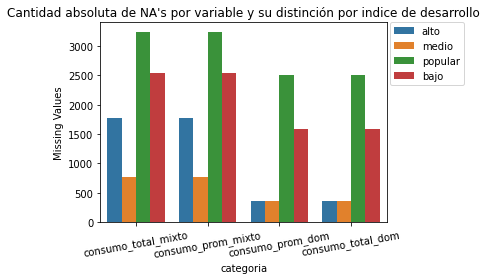

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


chart = sns.barplot(x = 'categoria', y = 'Missing Values', hue = 'indice', data = tabla_todos_NA )

#Poner el título a la gráfica
chart.set_title("Cantidad absoluta de NA's por variable y su distinción por indice de desarrollo")

# Rotar labels del eje x
chart.set_xticklabels(chart.get_xticklabels(), rotation=10)

#Mover cuadro de leyendas afuera de la gráfica
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()

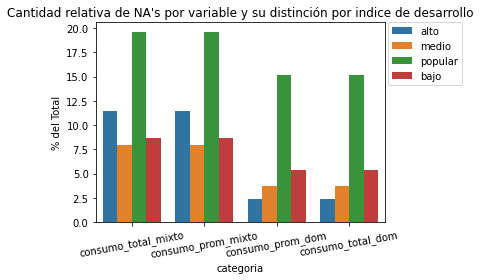

In [65]:
chart = sns.barplot(x = 'categoria', y = '% del Total', hue = 'indice', data = tabla_todos_NA )

#Poner el título a la gráfica
chart.set_title("Cantidad relativa de NA's por variable y su distinción por indice de desarrollo")

# Rotar labels del eje x
chart.set_xticklabels(chart.get_xticklabels(), rotation=10)

#Mover cuadro de leyendas afuera de la gráfica
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()

(0.0, 10000.0)

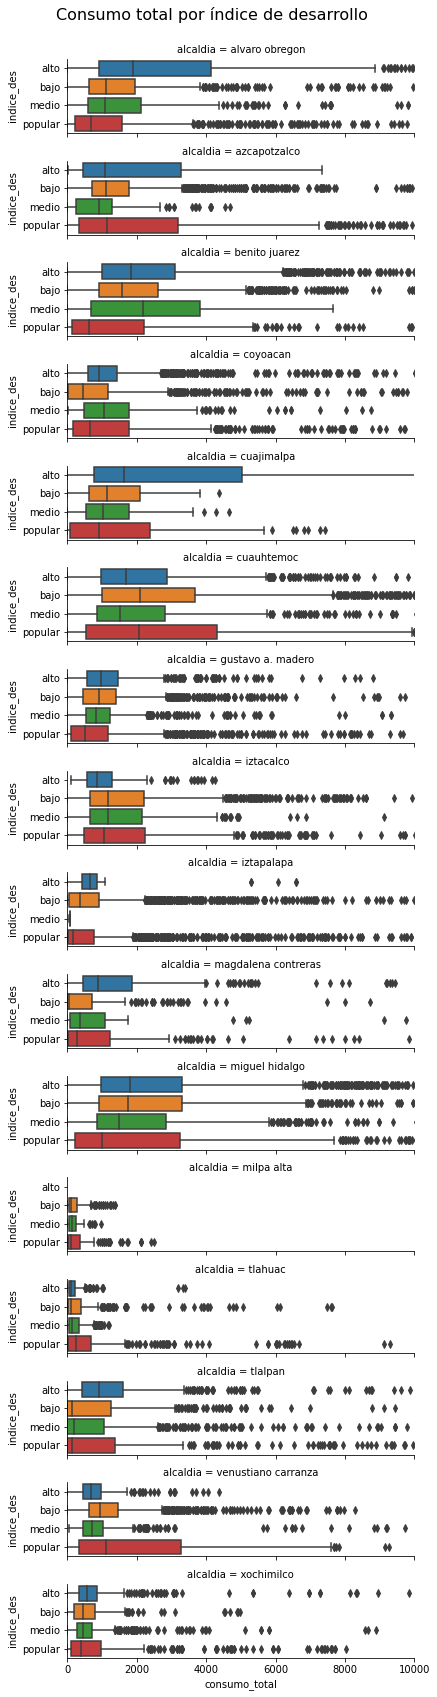

In [86]:
g = sns.catplot(x="consumo_total", 
            y="indice_des", row="alcaldia",kind="box", orient="h", height=1.5,
            aspect=4,data=agua)
g.fig.suptitle("Consumo total por índice de desarrollo", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top = 0.95)
plt.xlim(0,10000)

(0.0, 500.0)

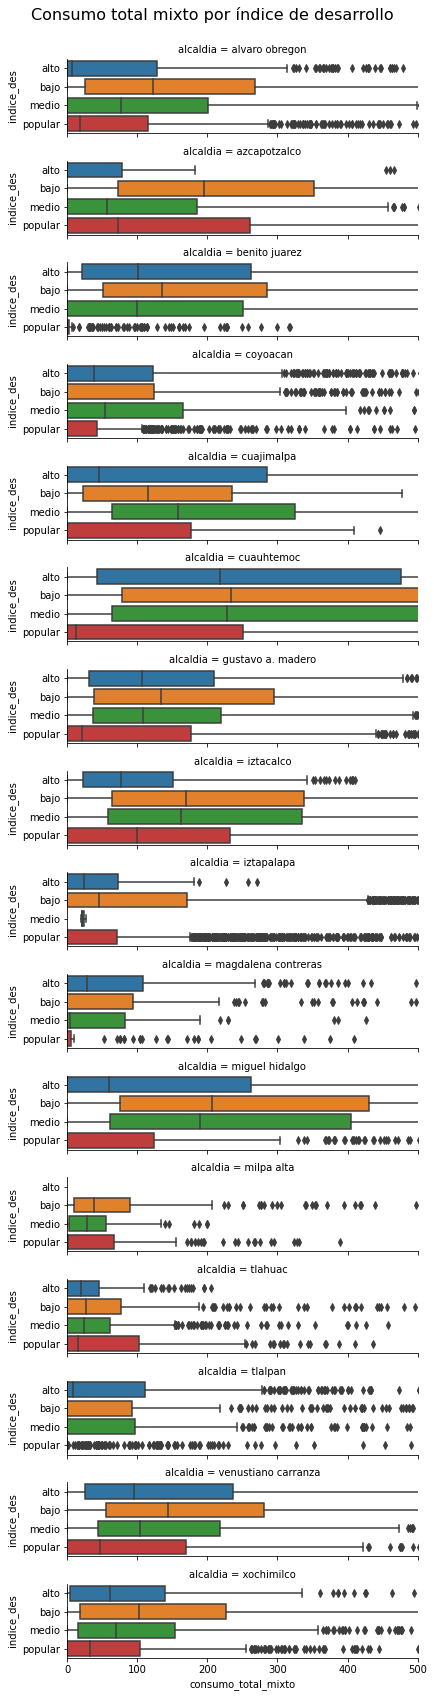

In [84]:
g = sns.catplot(x="consumo_total_mixto", 
            y="indice_des", row="alcaldia",kind="box", orient="h", height=1.5, 
            aspect=4,data=agua)

g.fig.suptitle("Consumo total mixto por índice de desarrollo", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top = 0.95)
plt.xlim(0,500)

### Análisis de ceros

In [68]:
### Libreria necesaria
#imports del notebook anterior
import re
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import csv
import requests

#disable warnings messages
import warnings
warnings.simplefilter("ignore")

#imports para graficar
import matplotlib.pyplot as plt
import seaborn as sns

#importando librería propia
import sys
sys.path.append('./../')

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

#Own Library modules
import src
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.algorithms import eda as eda_eq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
# para leer el archivo como local
#agua = pd.read_csv('../data/consumo-agua.csv')

# para leer el archivo de la liga
CSV_URL = 'https://datos.cdmx.gob.mx/explore/dataset/consumo-agua/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
agua_liga = pd.read_csv(CSV_URL)
agua = agua_liga
agua = eda_eq.prepara_dataset(agua)

In [88]:
variables_numericas = np.array(["consumo_total_mixto", "consumo_prom_dom", "consumo_total_dom", 
                                "consumo_prom_mixto", "consumo_total", "consumo_prom", "consumo_prom_no_dom",
                               "consumo_total_no_dom"])
print(variables_numericas)

['consumo_total_mixto' 'consumo_prom_dom' 'consumo_total_dom'
 'consumo_prom_mixto' 'consumo_total' 'consumo_prom' 'consumo_prom_no_dom'
 'consumo_total_no_dom']


Los siguientes histogramas muestran la **gran densidad en niveles bajos** (ceros y/o cercanos a dicho valor), además de que se logra apreciar que todas las variables poseen colas pesadas, pues hay valores muy altos para todas las variables.

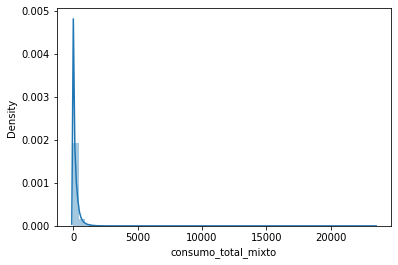

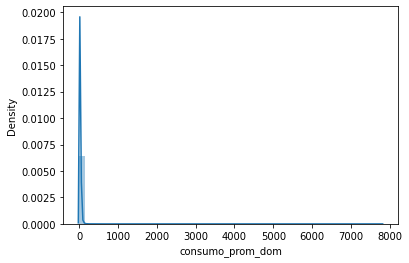

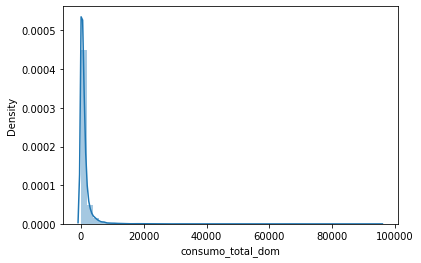

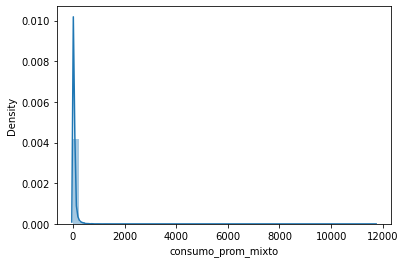

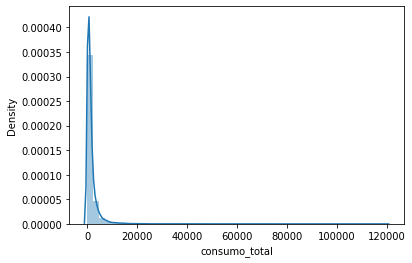

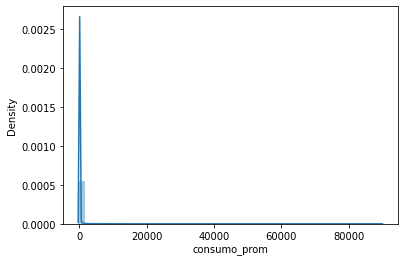

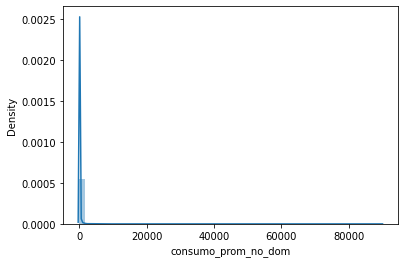

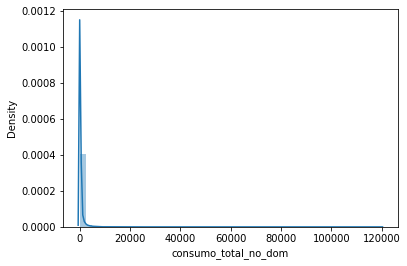

In [89]:
for column in variables_numericas:
    plt.figure()
    sns.distplot(agua[column])

En la siguiente sección se realizará un análisis detallado en aquellas observaciones donde no hubo medición en el consumo de agua, es decir, en donde el **consumo fue cero** para el periodo en cuestión.

In [90]:
# Filtrar por suma por renglones igual a cero
agua["suma"] = agua[variables_numericas].sum(axis=1)
agua_no_zero = agua[agua.suma == 0]
agua_no_zero = agua_no_zero[agua.columns.difference(np.append(variables_numericas, 'suma'))]

In [91]:
n_zero = agua_no_zero.shape[0]
n_agua = agua.shape[0]
print(n_zero/n_agua)

0.03447160417428483


Los valores que contienen puros ceros en las variables numéricas corresponden aproximadamente al $3.4\%$ de los datos, se preguntará a cliente porqué tenemos observaciones sin consumo de agua para dichos periodos y lugares:
* ¿Esto se debe a un error de medición o captura de los datos?
* ¿Son establecimientos que no son habitados o fueron deshabitados a lo largo del periodo en cuestión? 
* Alguna otra opción.

In [92]:
variables_categoricas = np.array(['alcaldia', 'bimestre', 'colonia', 'gid', 'indice_des', 'nomgeo'])
for column in variables_categoricas:
    aux = pd.crosstab(index = agua_no_zero[column], columns='count')
    aux = aux.sort_values('count', ascending = False)
    print(column)
    print(aux.head())

alcaldia
col_0                count
alcaldia                  
iztapalapa            1119
tlalpan                420
gustavo a. madero      159
coyoacan               136
magdalena contreras    115
bimestre
col_0     count
bimestre       
1           836
2           810
3           805
colonia
col_0                         count
colonia                            
santa maria aztahuacan           51
xalpa                            48
buenavista                       46
lomas de zaragoza                36
pueblo santa cruz meyehualco     35
gid
col_0  count
gid         
321        1
47242      1
47225      1
47226      1
47228      1
indice_des
col_0       count
indice_des       
popular      1227
bajo          952
medio         202
alto           70
nomgeo
col_0                   count
nomgeo                       
iztapalapa               1119
tlalpan                   420
gustavo a. madero         159
coyoacan                  136
la magdalena contreras    115


* La alcaldía de Iztapalapa tiene una cantidad de ceros "fuera de lo común", en el sentido de que se encuentra muy por encima de los demás valores.
* El índice de desarrollo popular tiene una cantidad de ceros "fuera de lo común".
* Entre las demás variables, la cantidad de ceros no es fuera de lo común (los rangos de dispersión no son muy altos).

Text(0.5, 1.0, 'Distribución de ceros por alcaldías y colonias')

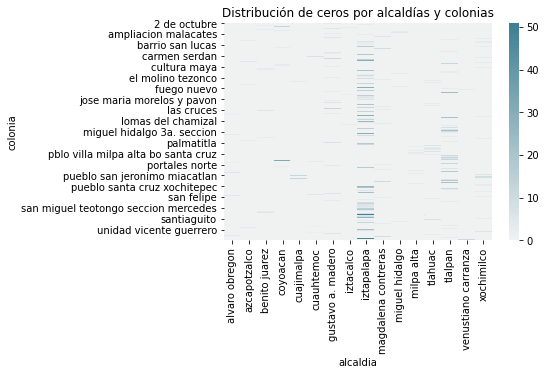

In [93]:
cross_col_alc = pd.crosstab(index = agua_no_zero['colonia'], columns =  agua_no_zero['alcaldia'])
sns.heatmap(cross_col_alc, 
            cmap = sns.diverging_palette(20, 220, n = 200), 
            center = 0).set_title('Distribución de ceros por alcaldías y colonias')

Cabe mencionar que no todas las colonias se encuentran en cada una de las alcaldías, lo cual puede confundir al lector, esta tabla muestra la cantidad de ceros que cada una de las colonias de distintas alcaldías. Nótese que las alcaldías de Iztapalapa y Tlalpan contienen una mayor cantidad de ceros, esto se debe a que son las que contienen más colonias. La siguiente tabla muestra la cantidad de colonias por alcaldía.

In [94]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

n_by_alcaldia = agua_no_zero.groupby('alcaldia')['colonia'].nunique()
n_by_alcaldia = n_by_alcaldia.sort_values(ascending = False)
n_by_alcaldia = pd.DataFrame(n_by_alcaldia)

n_by_alcaldia_compl = agua.groupby('alcaldia')['colonia'].nunique()
n_by_alcaldia_compl = n_by_alcaldia_compl.sort_values(ascending = False)
n_by_alcaldia_compl = pd.DataFrame(n_by_alcaldia_compl)

display_side_by_side(n_by_alcaldia, n_by_alcaldia_compl)

,colonia
alcaldia,
iztapalapa,90
tlalpan,56
gustavo a. madero,32
xochimilco,26
tlahuac,22
magdalena contreras,20
alvaro obregon,18
coyoacan,17
milpa alta,11


En la tabla izquierada se muestra la cantidad de colonias que tiene cada alcaldía para aquellas observaciones que tienen ceros en todas las variables numéricas, mientras que en la tabla derecha se muestran los datos completos. 
Los datos no son afectados por este suceso de manera uniforme, pues se esperaría que se mantuviera el orden de las alcaldías en relación a la cantidad de colonias que poseen. Hay colonias que son más afectadas que otras, por lo que habrá que aclarar con cliente a qué se debe este fenómeno.

Se observa que hay un patrón: independientemente de la alcaldía, si hay ceros en el nivel popular, entonces hay ceros en el nivel bajo y viceversa, por lo que son estos $2$ ídices de desarrollo que son más afectados por la cantidad de ceros, lo cual no es para sorprenderse, debido a que son los que presentan mayor densidad. Sin embargo, para el caso de Tlalpan, se incluye el índice medio, donde se concluye que los 3 niveles son afectados, sin importar la densidad.

In [95]:
n_by_alcaldia = agua_no_zero.groupby("indice_des")["indice_des"].count()
n_by_alcaldia = n_by_alcaldia.sort_values(ascending = False)
n_by_alcaldia

indice_des
popular    1227
bajo        952
medio       202
alto         70
Name: indice_des, dtype: int64

Text(0.5, 1.0, 'Distribución de ceros por índice de darrrollo y colonias')

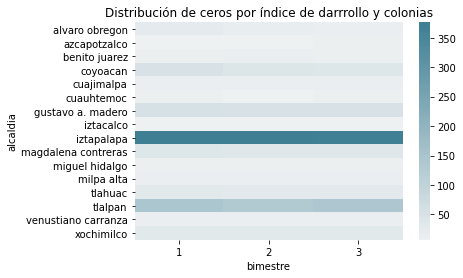

In [96]:
cross_col_alc = pd.crosstab(index = agua_no_zero['alcaldia'], columns =  agua_no_zero['bimestre'])
sns.heatmap(cross_col_alc, 
            cmap = sns.diverging_palette(20, 220, n = 200), 
            center = 0).set_title('Distribución de ceros por índice de darrrollo y colonias')

Las colonias presentan la misma cantidad de ceros a lo largo del semestre, de lo que concluímos que la presencia de ceros en las observaciones no se debe a un tema temporal, sino que esto se presenta de manera recurrente cada periodo.

Text(0.5, 1.0, 'Longitud y latitud (ceros)')

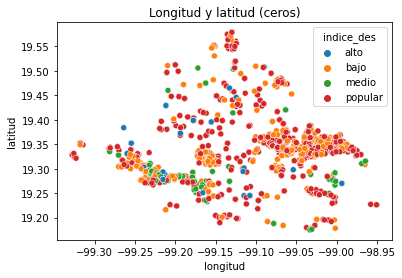

In [97]:
agua_no_zero = agua[agua.suma == 0]
sns.scatterplot(x = agua_no_zero['longitud'], 
                y = agua_no_zero['latitud'], 
                hue = agua_no_zero['indice_des']).set_title('Longitud y latitud (ceros)')

Observamos que se pueden observar ciertas zonas en donde hay una mayor agrupación de datos, esto se debe a la densidad en las zonas, no a que haya un fallo en la medición.

Conclusión:
* Las alcaldías con mayor cantidad de ceros son Iztapalapa, seguida de Tlalpan, este punto no es para alarmarse, pues se debe a que son las que presentan una mayor densidad.
* A lo largo del tiempo, las distintas alcaldías han tenido el mismo comportamiento en relación a los ceros.
* Los principales índices de desarrollo afectados por este "suceso" son popular, seguido del bajo, lo cual se debe a la densidad en dichos índices.
* Por último, concluimos que la presencia de ceros no se debe a que en una zona haya fallos en la medición o errores de captura, pues es un fenómeno que se presenta de manera similar a lo largo de los tiempos en la misma cantidad para los distintos lugares.